# Analyse des déserts médicaux

#### Alexis COTTEZ, Faustine VALLET  
Master 2 / MAG 3 (Aix Marseille School of Economics)

## Présentation de notre étude

Bien qu'à l'échelle nationale les professionnels de santé ne manquent pas (**334 médecins pour 100 000 habitants** en France d'après l'INSEE), le pays compte toutefois de nombreux déserts médicaux, c’est-à-dire des territoires où l’offre médicale est insuffisante pour répondre aux besoins de la population.  

Cependant les déserts médiaux restent difficiles à définir. Le rapport entre le nombre de professionnels de santé et la taille de population d'un territoire donné n'est-il pas un peu trop réducteur? Pour tenter d'enrichir la définition de ce concept encore vague, la *DREES* (Direction de la recherche, des études, de l’évaluation et des statistiques) et l’*IRDES* (Institut de recherche et de documentation en économie de la santé) ont développé conjointement un indicateur d’accessibilité aux soins nommé l’**Accessibilité Potentielle Localisée (APL)**. Selon cet indicateur, la définition d'un désert médical repose sur: 

- L’activité de chaque praticien, mesurée par le nombre de consultations ou visites effectuées par le praticien;
- Le temps d'accès au praticien selon une fonction décroissante entre 0 et 20 minutes;
- La consommation de soins par classe d'âge pour tenir compte des besoins différenciés en offre de soins;
- Le but étant d'obtenir in-fine le nombre de consultations/visites accessibles pour chaque habitant. Sachant qu'en France un habitant bénéficie en moyenne nationale de 3,8 consultations par an, un territoire est considéré comme un désert médical lorsque le nombre de consultations par habitant et par an est inférieur à 2,5, en tenant également compte de l'offre des médecins généralistes âgés de 65 ans ou moins, ceux-ci étant proche de leur départ en retraite.

Dans le cadre de ce projet, nous sommes bien entendu limités par les données disponibles. Néanmoins nous avons jugé intéressant de créer un nouvel indicateur, inspiré du deuxième point de l'APL: nous n'avons pas de données sur le temps d'accès à un praticien du fait que l'API de Google soit payante à ce jour, toutefois, nous avons pu obtenir les distances en kilomètres entre chaque code commune en téléchargeant une nouvelle base de données présentant les données spatiales longitude et latitude. De cette façon nous avons pu nous focaliser sur les communes qui n'ont pas de professionnels de santé et calculer la distance qui les séparait d'une commune qui en dépose - et le nombre de praticiens disponibles. En effet, dans les zones rurales tout particulièrement, il n'y a rien d'anormal à ce qu'une petite commune n'est pas de professionnel de santé, et ce n'est pas un problème en soi tant que les habitants peuvent en trouver à quelques kilomètres (et minutes) de chez eux dans le village d'à côté. Mais si quelques kilomètres se transforent en plusieurs dizaines de kilomètres, c'est certainement là que nous pouvons commencer à parler de déserts médicaux, d'où l'intérêt de cet indicateur que vous retrouverez dans le notebook `preparation-filosofi`. Dès lors, grace aux données de localisation `longitude` et `latitude` notre fonction permet de retourner la distance à vol d'oiseau d'un généraliste, d'un hopital, d'au moins 3 soins de base, spécialistes réguliers et spécialistes particuliers pour des villes qui n'en présentent aucun ou moins de trois pour les dernières groupes de soins. Nous pourrions par ailleur améliorer cet indiquateur en utilisant la distance Manhattan ou Chebyshev au lieu de la distance Euclidienne.

<table border="0">
    <caption align="bottom"><b style="font-size:20px">Liste des différentes distances</b></caption>
 <tr>
    <td><b style="font-size:30px">Distance Euclidienne </b></td>
    <td><b style="font-size:30px">Manhattan Distance  </b></td>
    <td><b style="font-size:30px">Chebyshev Distance  </b></td>
 </tr>
 <tr>
    <td> <b style="font-size:20px"> $$ \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$ </b> </td>
    <td><b style="font-size:20px"> $$ \mid x_1 - x_2 \mid + \mid y_1 - y_2 \mid   $$  </b></td>
    <td><b style="font-size:20px">$$ \max{( \mid x_1 - x_2 \mid, \mid y_1 - y_2 \mid )} $$  </b></td>
 </tr>
 <tr>
    <td><img src="../reports/figures/euclidean.png" alt="" border=3 height=100 width=300></img></td>
    <td><img src="../reports/figures/manhattan.png" alt="" border=3 height=100 width=300></img></td>
    <td><img src="../reports/figures/chebyshev.png" alt="" border=3 height=100 width=300></img></td>
 </tr>
  <tr>
    <td><b>Ligne droite</b> entre deux points</td>
    <td><b>Distance L1</b>, en zig-zag comme dans les villes américaines où les rues sont relativement parralèles et perpendiculaires</td>
    <td>Les <b>8 coins</b> adjacents sont atteignables en 1 seul mouvement</td>
 </tr>
</table>



Référence : *EUCLIDEAN VS CHEBYSHEV VS MANHATTAN DISTANCE*, [LYFAT](https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/), 2012.

Dans ce présent notebook, une partie a été établie lors du cours de PROJET et nous avons apporté nos modifications à celui-ci pour une meilleur automatisation et réduire les copiés-collés. 

## Nos résultats 

Nos nouveaux indicateurs nous permettent de conclure les éléments suivant: 
- Il y a **85** villes à plus de **10km** d'au moins un médecin **généraliste** ;
- Il y a **4 288** villes à plus de **10km** d'un **hôpital** ;
- Il y a **1 178** villes à plus de **10km** d'au moins 3 **soins de base** ;
- Il y a **133** villes à plus de **10km** d'au moins 3 **spécialistes réguliers** ;
- Il y a **133** villes à plus de **10km** d'au moins 3 **spécialistes particuliers**.

Ces résultats sont à relativiser du fait que ce sont des distances à vol d'oiseau. Dès lors 10km en Corse ne prendra pas le même temps de trajet que 10km entre Marseille et Aubagne. 





## Limites de notre étude 

Comme nous l'avons présenté précédemment, une analyse avec des temps de trajets permettrait de davantage corroborer à l'indicateur APL (Accessibilité Potentielle Localisée). Malheureusement, l'API de Google Maps qui pourrait nous fournir ces informations est dorénavant payante. 

Nous pourrions améliorer l'étude si nous disposions de l'âge des professionnels de santé, comme montré précédemment et l'âge moyen ou sa répartition en catégories des habitants de chaque commune pour en déduire leur besoin de bien de santé.

Les distances calculées pourraient évoluer en utilisant d'autres techniques de calculs. 

Au vu du nombres de projets de fin d'année de Master 2 que nous avions à rendre dans les dernières semaines, nous ne pouvions pas établir de Dashboard en utilisant Plotly. Nous avons préféré établir cet indicateur relativement performant et présenter nos résultats avec une touche d'interactivité grave aux Ipywidgets. 

### Import des packages et de la table

In [2]:
import os

import pandas as pd

import numpy as np

%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

import mapclassify

#import pysal.esda.mapclassify as mapclassify
import pandas as pd
import os
from mapboxgl.utils import *
from mapboxgl.viz import *
import numpy as np

import mapclassify
from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz

#import pygal.maps.fr

import ipywidgets as widgets

# Déclaration des constantes

In [3]:
DATA_DIR = '../data/external/'
PROCESS_DIR = '../data/processed/'

CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
COMMUNES_FILENAME = 'PS_communes.csv'
ANALYSIS_FILENAME = 'analyse_filosofi.csv'
APPARTENANCE_GEO_FILENAME = 'table-appartenance-geo-communes-18_V2.xls'

MAPBOX_ACCESS_TOKEN = 'pk.eyJ1IjoiYWxleGNvdDEzIiwiYSI6ImNqdDBpOWtxaDB2cXAzeXF0MGU4Mmc3YzIifQ.YVNA_UtB0bASO-5p1qe_ug' # ALEXIS COTTEZ    

### Premières analyses

In [4]:
df = pd.read_csv(os.path.join(PROCESS_DIR, ANALYSIS_FILENAME), sep=';',
                     dtype={'CODGEO':str, 'codecommuneetablissement':str})
df.head()

/Users/alexiscot/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,ville_code_commune,ville_canton,ville_densite_2010,ville_longitude_deg,ville_latitude_deg,dist_generaliste,dist_hopital,dist_soin_base,dist_spe_regulier,dist_spe_particulier
0,01001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,01001,10.0,49.0,4.91667,46.15,3.919269,5.343667,5.343667,3.851641,5.343667
1,01002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,01002,1.0,24.0,5.41667,46.00,3.702791,7.579890,3.702791,3.702791,3.805566
2,01004,1.0,4.0,21.0,35.0,9.0,15.0,25.0,8.0,32.0,...,01004,1.0,562.0,5.35000,45.95,0.000000,0.000000,0.000000,0.000000,0.000000
3,01005,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,...,01005,30.0,101.0,4.90000,46.00,0.000000,9.822801,9.011880,0.000000,9.011880
4,01007,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,4.0,...,01007,1.0,70.0,5.35000,46.00,0.000000,5.559746,0.000000,0.000000,0.000000


**Rappel** :  
*NBMENFISC15* : # foyers fiscaux  
*NBPERSMENFISC15* : # Habitants/foyers * foyers fiscaux



In [5]:
df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe',
       'services_medicaux', 'soin_de_base', 'spe_regulier', 'spe_particulier',
       'CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'ville_code_commune', 'ville_canton', 'ville_densite_2010',
       'ville_longitude_deg', 'ville_latitude_deg', 'dist_generaliste',
       'dist_hopital', 'dist_soin_base', 'dist_spe_regulier',
       'dist_spe_particulier'],
      dtype='object')

In [6]:
print(df.iloc[:,13:20].corr(), "\n \nOn observe des corrélations entre la présence de services médicaux, \nquels qu'ils soient et le nombre de foyers fiscaux")

                   services_medicaux  soin_de_base  spe_regulier  \
services_medicaux           1.000000      0.984364      0.990536   
soin_de_base                0.984364      1.000000      0.962008   
spe_regulier                0.990536      0.962008      1.000000   
spe_particulier             0.977723      0.964410      0.943415   
NBMENFISC15                 0.502568      0.501650      0.499385   

                   spe_particulier  NBMENFISC15  
services_medicaux         0.977723     0.502568  
soin_de_base              0.964410     0.501650  
spe_regulier              0.943415     0.499385  
spe_particulier           1.000000     0.484020  
NBMENFISC15               0.484020     1.000000   
 
On observe des corrélations entre la présence de services médicaux, 
quels qu'ils soient et le nombre de foyers fiscaux


### Déserts médicaux : 

Un désert médical se caractérise comme suit:

$$ \frac{\text{Nombre de médecins}}{\text{ Nombre d'habitants}} < \frac{105}{\text{100 000}} $$

Source: https://www.keldoc.com/actu/articles/appelle-on-deserts-medicaux

In [7]:
df['departement'] = df['codecommuneetablissement'].str[:2]

In [8]:
df['servicesmedicaux_par_foyerfiscaux'] =  df['services_medicaux'] / df['NBPERSMENFISC15']

In [9]:
print('Il y a',len(df[df['servicesmedicaux_par_foyerfiscaux']<105/100000]),'déserts médicaux')

Il y a 12619 déserts médicaux


In [10]:
print('Nombre généralistes par 100 000 habitants :' , 100000 * df['generaliste'].sum() /df['NBPERSMENFISC15'].sum())

Nombre généralistes par 100 000 habitants : 144.52075190279163


In [11]:
print('Nombre infirmiers par 100 000 habitants :' , 100000 * df['infirmiers'].sum() /df['NBPERSMENFISC15'].sum())

Nombre infirmiers par 100 000 habitants : 196.45291453001815


In [12]:
print('Nombre spécialistes par 100 000 habitants :' , 100000 * (df['autre_specialiste'] + df['autre_specialiste'] ).sum()/df['NBPERSMENFISC15'].sum())

Nombre spécialistes par 100 000 habitants : 153.66710679091295


In [13]:
df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe',
       'services_medicaux', 'soin_de_base', 'spe_regulier', 'spe_particulier',
       'CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'ville_code_commune', 'ville_canton', 'ville_densite_2010',
       'ville_longitude_deg', 'ville_latitude_deg', 'dist_generaliste',
       'dist_hopital', 'dist_soin_base', 'dist_spe_regulier',
       'dist_spe_particulier', 'departement',
       'servicesmedicaux_par_foyerfiscaux'],
      dtype='object

In [14]:
df.shape

(35922, 59)

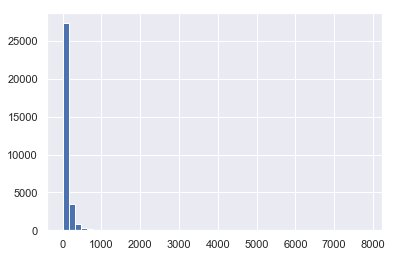

In [15]:
sns.set()
(100000 * df['generaliste'] /df['NBPERSMENFISC15']).hist(bins=50)

In [16]:
df['generaliste_hbt'] = (100000 * df['generaliste'] /df['NBPERSMENFISC15'])

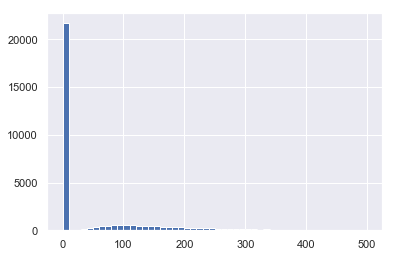

In [17]:
df.query('generaliste_hbt < 500')['generaliste_hbt'].hist(bins=50)

In [18]:
appartenance = pd.read_excel(os.path.join(DATA_DIR, APPARTENANCE_GEO_FILENAME), skiprows=5)
appartenance.head()

,CODGEO,LIBGEO,DEP,REG,EPCI,NATURE_EPCI,ARR,CV,ZE2010,UU2010,TUU2015,TDUU2015,AU2010,TAU2015,CATAEU2010,BV2012
0,01001,L'Abergement-Clémenciat,01,84,200069193,CC,012,0108,8213,01000,0,5,997,0,120,01093
1,01002,L'Abergement-de-Varey,01,84,240100883,CC,011,0101,8201,01000,0,4,002,9,112,01004
2,01004,Ambérieu-en-Bugey,01,84,240100883,CC,011,0101,8201,01302,3,32,002,9,112,01004
3,01005,Ambérieux-en-Dombes,01,84,200042497,CC,012,0122,8213,01000,0,6,002,9,112,69123
4,01006,Ambléon,01,84,200040350,CC,011,0104,8216,01000,0,3,998,0,300,01034


In [19]:
df.loc[df.CODGEO.isnull()]['codecommuneetablissement'].str[:2].value_counts()

97    67
98     6
29     1
Name: codecommuneetablissement, dtype: int64

In [20]:
df.loc[df.CODGEO.isnull() & (df.codecommuneetablissement.str[:2]=='98')]

,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,ville_longitude_deg,ville_latitude_deg,dist_generaliste,dist_hopital,dist_soin_base,dist_spe_regulier,dist_spe_particulier,departement,servicesmedicaux_par_foyerfiscaux,generaliste_hbt
20472,98733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN
20473,98735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,98,NaN,NaN
20474,98738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,98,NaN,NaN
20475,98749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,98,NaN,NaN
20476,98812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,98,NaN,NaN
20477,98818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,2.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,98,NaN,NaN


In [21]:
df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe',
       'services_medicaux', 'soin_de_base', 'spe_regulier', 'spe_particulier',
       'CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'ville_code_commune', 'ville_canton', 'ville_densite_2010',
       'ville_longitude_deg', 'ville_latitude_deg', 'dist_generaliste',
       'dist_hopital', 'dist_soin_base', 'dist_spe_regulier',
       'dist_spe_particulier', 'departement',
       'servicesmedicaux_par_foyerfiscaux', 'generaliste_hbt'],


In [22]:
dept_df = (df
          .dropna(subset=['CODGEO', 'NBPERSMENFISC15'])
          .assign(departement = lambda x: x.CODGEO.str[:2])
          .groupby('departement')
          [['NBPERSMENFISC15', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe',
       'services_medicaux',]]
          .sum()
          )

In [23]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,reeducateur_podologe,services_medicaux
departement,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,1.0,38.0,959.0,4252.0
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,5.0,59.0,562.0,3186.0
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,2.0,30.0,525.0,2557.0
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,0.0,6.0,419.0,2033.0
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,2.0,25.0,596.0,2126.0


### Création de variables par habitants

In [24]:
dept_df['generaliste_hbt'] = 100000* dept_df.generaliste / dept_df.NBPERSMENFISC15
dept_df['infirmier_hbt'] = 100000* dept_df.infirmiers / dept_df.NBPERSMENFISC15
dept_df['ambulancier_hbt'] = 100000* dept_df.ambulance / dept_df.NBPERSMENFISC15
dept_df['hopital_hbt'] = 100000 * dept_df.hopital/ dept_df.NBPERSMENFISC15

### Visualisation de ces nouvelles variables

In [25]:
def update_plot(value):
    dataframe = dept_df
    dataframe[value].hist(bins=30)
    plt.gcf().set_size_inches(11.7, 8.27)
    return plt



first = widgets.Dropdown(
    options=['generaliste_hbt','ambulancier_hbt','infirmier_hbt','hopital_hbt'],
    value='generaliste_hbt',
    description='Histogramme :',
    disabled=False,
)

widgets.interactive(update_plot, value=first)


interactive(children=(Dropdown(description='Histogramme :', options=('generaliste_hbt', 'ambulancier_hbt', 'in…

In [26]:
def update_describe(value):
    dataframe = dept_df
    aa = dataframe[value].describe()
    return print('Distribution de {} :\n\n{}'.format(value, aa))



first = widgets.Dropdown(
    options=['generaliste_hbt','ambulancier_hbt','infirmier_hbt','hopital_hbt'],
    value='generaliste_hbt',
    description='Distribution :',
    disabled=False,
)

widgets.interactive(update_describe, value=first)


interactive(children=(Dropdown(description='Distribution :', options=('generaliste_hbt', 'ambulancier_hbt', 'i…

In [27]:
def update_plot(x_val, y_val):
    dataframe = dept_df
    plt.figure(figsize=(15,10))
    sns.regplot( x=x_val, y=y_val, data=dataframe).set_title('Graphique de {} en fonction de la variable {} par département'.format(x_val,y_val));

    for i in range(0,dataframe.shape[0]):
        plt.text(dataframe[x_val].iloc[i]+1,
                 dataframe[y_val].iloc[i]+1,
                 dataframe.index[i], 
                 fontsize=9
                );
    return plt



first = widgets.Dropdown(
    options=['generaliste_hbt','ambulancier_hbt','infirmier_hbt','hopital_hbt'],
    value='generaliste_hbt',
    description='X :',
    disabled=False,
)

second = widgets.Dropdown(
    options=['generaliste_hbt','ambulancier_hbt','infirmier_hbt','hopital_hbt'],
    value='infirmier_hbt',
    description='Y :',
    disabled=False,
)

widgets.interactive(update_plot, x_val=first, y_val=second)


interactive(children=(Dropdown(description='X :', options=('generaliste_hbt', 'ambulancier_hbt', 'infirmier_hb…

In [28]:
#fr_chart = pygal.maps.fr.Departments()
#fr_chart.title = 'Generalistes par 100 000 habitants'
#fr_chart.add(title='Généralistes', values=dept_df['generaliste_hbt'].to_dict()
#)
#fr_chart.render_in_browser()


## EXAMEN

### Comment caractériser un désert médical ?  DEADLINE: 29 MARS 2019

In [29]:
df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe',
       'services_medicaux', 'soin_de_base', 'spe_regulier', 'spe_particulier',
       'CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'ville_code_commune', 'ville_canton', 'ville_densite_2010',
       'ville_longitude_deg', 'ville_latitude_deg', 'dist_generaliste',
       'dist_hopital', 'dist_soin_base', 'dist_spe_regulier',
       'dist_spe_particulier', 'departement',
       'servicesmedicaux_par_foyerfiscaux', 'generaliste_hbt'],


In [30]:
df['ambulance_hbt'] = (100000 * df['ambulance'] /df['NBPERSMENFISC15'])
df['hopital_hbt'] = (100000 * df['hopital'] /df['NBPERSMENFISC15'])

In [31]:
clean = df[['ambulance', 'analyse_medicale', 'autre','autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital','infirmiers', 'organe', 'radiologiste', 'reeducateur_podologe','services_medicaux', 'soin_de_base', 'spe_regulier', 'spe_particulier','dist_generaliste', 'dist_hopital', 'dist_soin_base','dist_spe_regulier','dist_spe_particulier','ville_latitude_deg','ville_longitude_deg','servicesmedicaux_par_foyerfiscaux', 'generaliste_hbt','hopital_hbt','ambulance_hbt','NBPERSMENFISC15']].dropna().round(3)

In [32]:
clean.head()

,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,...,dist_soin_base,dist_spe_regulier,dist_spe_particulier,ville_latitude_deg,ville_longitude_deg,servicesmedicaux_par_foyerfiscaux,generaliste_hbt,hopital_hbt,ambulance_hbt,NBPERSMENFISC15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.344,3.852,5.344,46.15,4.917,0.001,0.000,0.000,0.000,801.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.703,3.703,3.806,46.00,5.417,0.004,0.000,0.000,0.000,245.5
2,1.0,4.0,21.0,35.0,9.0,15.0,25.0,8.0,32.0,0.0,...,0.000,0.000,0.000,45.95,5.350,0.014,179.636,57.484,7.185,13917.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,9.012,0.000,9.012,46.00,4.900,0.007,119.653,0.000,0.000,1671.5
4,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.000,0.000,0.000,46.00,5.350,0.006,189.717,0.000,0.000,2635.5


In [33]:
# Create a geojson file export from the current dataframe
df_to_geojson(clean, filename='points1.geojson',
              properties=['dist_generaliste', 'dist_hopital', 'dist_soin_base','dist_spe_regulier','dist_spe_particulier','generaliste_hbt','ambulance_hbt','hopital_hbt'], 
                     lat='ville_latitude_deg', lon='ville_longitude_deg', precision=3)

{'type': 'file', 'filename': 'points1.geojson', 'feature_count': 19938}

In [34]:
# Génération des bins et de la couleur des graphiques 

def update_plot(color):
    color_breaks = mapclassify.Natural_Breaks(clean[color], k=8, initial=0).bins
    #color_breaks = [0, 5, 10, 20]
    color_stops = create_color_stops(color_breaks, colors='YlGnBu')

    # Create the viz from the dataframe
    viz = CircleViz('points1.geojson',
                    access_token=MAPBOX_ACCESS_TOKEN, 
                    height='600px',
                    color_property = color,
                    color_stops = color_stops,
                    center = (4, 47),
                    zoom = 4.8,
                    below_layer = 'waterway-label')

    viz.add_snapshot_links = True
    viz.style_url='mapbox://styles/mapbox/dark-v9?optimize=true'
    viz.show()


first = widgets.Dropdown(
    options=['dist_generaliste', 'dist_hopital', 'dist_soin_base','dist_spe_regulier','dist_spe_particulier', 'generaliste_hbt','ambulance_hbt','hopital_hbt'],
    value='dist_soin_base',
    description='Option :',
    disabled=False,
)

widgets.interactive(update_plot, color=first)

interactive(children=(Dropdown(description='Option :', index=2, options=('dist_generaliste', 'dist_hopital', '…

In [35]:
# Génération des bins et de la couleur des graphiques 

def update_plot(color, radius):
    color_breaks = mapclassify.Natural_Breaks(clean[color], k=8, initial=0).bins
    #color_breaks = [0, 5, 10, 20]
    color_stops = create_color_stops(color_breaks, colors='YlGnBu')

    radius_breaks = mapclassify.Natural_Breaks(clean[radius], k=8, initial=0).bins
    radius_stops = create_radius_stops(radius_breaks, 1, 10)

    # Create the viz from the dataframe
    viz = GraduatedCircleViz('points1.geojson',
                    access_token=MAPBOX_ACCESS_TOKEN, 
                    height='600px',
                    color_property = color,
                    color_stops = color_stops,
                    radius_property = radius,
                    radius_stops = radius_stops,
                    center = (4, 47),
                    zoom = 4.8,
                    below_layer = 'waterway-label')

    viz.add_snapshot_links = True
    viz.style_url='mapbox://styles/mapbox/dark-v9?optimize=true'
    viz.show()



first = widgets.Dropdown(
    options=['dist_generaliste', 'dist_hopital', 'dist_soin_base','dist_spe_regulier','dist_spe_particulier', 'generaliste_hbt','ambulance_hbt','hopital_hbt'],
    value='generaliste_hbt',
    description='Couleur :',
    disabled=False,
)

second = widgets.Dropdown(
    options=['dist_generaliste', 'dist_hopital', 'dist_soin_base','dist_spe_regulier','dist_spe_particulier', 'generaliste_hbt','ambulance_hbt','hopital_hbt'],
    value='dist_soin_base',
    description='Taille :',
    disabled=False,
)

widgets.interactive(update_plot, color=first, radius=second)

interactive(children=(Dropdown(description='Couleur :', index=5, options=('dist_generaliste', 'dist_hopital', …


<h2><center>
Fin de ce notebook. Merci de l'avoir parcouru.
</center></h2>
<h2><center>
Réalisé par Alexis COTTEZ - Faustine VALLET 
</center></h2>
<img src="../reports/figures/amse_logo.png">
<h2><center>
Aix Marseille School of Economics (AMSE) - 29 Mars 2019
</center></h2>


